<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Generating-Data-set" data-toc-modified-id="Generating-Data-set-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Generating Data set</a></span></li><li><span><a href="#Setting-matrix" data-toc-modified-id="Setting-matrix-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setting matrix</a></span></li><li><span><a href="#Running-step-by-step-using-Gradient-descent" data-toc-modified-id="Running-step-by-step-using-Gradient-descent-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Running step by step using Gradient descent</a></span><ul class="toc-item"><li><span><a href="#Normalize-the-data" data-toc-modified-id="Normalize-the-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Normalize the data</a></span></li><li><span><a href="#Assigning-weights-and-bias" data-toc-modified-id="Assigning-weights-and-bias-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Assigning weights and bias</a></span><ul class="toc-item"><li><span><a href="#Weights" data-toc-modified-id="Weights-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Weights</a></span></li><li><span><a href="#Adding-bias-to-the-dataset" data-toc-modified-id="Adding-bias-to-the-dataset-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Adding bias to the dataset</a></span></li><li><span><a href="#Learning-rate" data-toc-modified-id="Learning-rate-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Learning rate</a></span></li></ul></li><li><span><a href="#Running-Gradient-descent" data-toc-modified-id="Running-Gradient-descent-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Running Gradient descent</a></span></li><li><span><a href="#Checking-residual-plots" data-toc-modified-id="Checking-residual-plots-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Checking residual plots</a></span></li></ul></li><li><span><a href="#Using-normal-equations-to-identify-parameters" data-toc-modified-id="Using-normal-equations-to-identify-parameters-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Using normal equations to identify parameters</a></span></li><li><span><a href="#Linear-Regression-class" data-toc-modified-id="Linear-Regression-class-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Linear Regression class</a></span></li><li><span><a href="#Regularized-Linear-Regression" data-toc-modified-id="Regularized-Linear-Regression-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Regularized Linear Regression</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_california_housing

## Generating Data set

In [2]:
raw_data_dict = fetch_california_housing()

print(raw_data_dict['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
raw_df = pd.DataFrame(raw_data_dict['data'], columns = raw_data_dict['feature_names'])
target_df = pd.DataFrame(raw_data_dict['target'], columns=raw_data_dict['target_names'])

In [4]:
raw_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [5]:
target_df.describe()

,MedHouseVal
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


## Setting matrix

In [6]:
X = raw_data_dict['data']

In [7]:
y = raw_data_dict['target'].reshape(-1,1)

In [8]:
X.shape

(20640, 8)

In [9]:
N,c = X.shape

## Running step by step using Gradient descent

### Normalize the data

In [10]:
# Mean and Standard deviation for each axis
X.mean(0), X.std(0)

(array([ 3.87067100e+00,  2.86394864e+01,  5.42899974e+00,  1.09667515e+00,
         1.42547674e+03,  3.07065516e+00,  3.56318614e+01, -1.19569704e+02]),
 array([1.89977569e+00, 1.25852527e+01, 2.47411320e+00, 4.73899376e-01,
        1.13243469e+03, 1.03857980e+01, 2.13590065e+00, 2.00348319e+00]))

In [11]:
X =( X - X.mean(0))/X.std(0)

In [12]:
X.shape

(20640, 8)

### Assigning weights and bias

#### Weights

In [13]:
# Weights
w = np.random.randn(c+1,1)

#### Adding bias to the dataset

In [14]:
X = np.hstack([np.ones_like(X[:,[1]]),X])

#### Learning rate

In [15]:
learning_rate = 1e-5

In [16]:
n_iter = 100

### Running Gradient descent

In [17]:
def mse(y, yhat):
    return np.mean((y-yhat)**2)

In [18]:
X.shape, w.shape

((20640, 9), (9, 1))

In [19]:
yhat = np.dot(X,w)

In [20]:
# Loss
mse(y, yhat)

22.635888598309332

In [21]:
for _ in range(1, n_iter*10):
    yhat = np.dot(X,w)
    
    print(f"Loss at {_} :",mse(y, yhat))
    grad  = np.dot(X.T, (y - yhat))

    w+=grad * learning_rate
    if np.allclose(grad, np.zeros_like(grad), rtol=1e-3, atol=1e-5):
        print("Stopped")
        break

Loss at 1 : 22.635888598309332
Loss at 2 : 13.715453051124705
Loss at 3 : 8.591713829648883
Loss at 4 : 5.554137295361785
Loss at 5 : 3.7141857843784125
Loss at 6 : 2.583571571904774
Loss at 7 : 1.8820241409918335
Loss at 8 : 1.4436039188827985
Loss at 9 : 1.1679872155575588
Loss at 10 : 0.9936875974222155
Loss at 11 : 0.8826894085985992
Loss at 12 : 0.8113553280453261
Loss at 13 : 0.7649336424641024
Loss at 14 : 0.734194816374731
Loss at 15 : 0.713353848812389
Loss at 16 : 0.6987796309101266
Loss at 17 : 0.6881902350693933
Loss at 18 : 0.680149939444856
Loss at 19 : 0.6737543061988429
Loss at 20 : 0.6684327537719577
Loss at 21 : 0.663824665228039
Loss at 22 : 0.6597015788473347
Loss at 23 : 0.6559182848629185
Loss at 24 : 0.6523820687067784
Loss at 25 : 0.649033354044438
Loss at 26 : 0.6458335118002387
Loss at 27 : 0.6427571765310536
Loss at 28 : 0.6397873996242138
Loss at 29 : 0.6369125890674754
Loss at 30 : 0.6341245751313679
Loss at 31 : 0.6314173861400489
Loss at 32 : 0.6287864724

Loss at 281 : 0.5249055061975271
Loss at 282 : 0.5248944323309828
Loss at 283 : 0.524883570088422
Loss at 284 : 0.5248729153653356
Loss at 285 : 0.5248624641387977
Loss at 286 : 0.5248522124657796
Loss at 287 : 0.5248421564815028
Loss at 288 : 0.5248322923978248
Loss at 289 : 0.5248226165016628
Loss at 290 : 0.5248131251534505
Loss at 291 : 0.5248038147856278
Loss at 292 : 0.5247946819011646
Loss at 293 : 0.5247857230721159
Loss at 294 : 0.5247769349382072
Loss at 295 : 0.5247683142054518
Loss at 296 : 0.5247598576447973
Loss at 297 : 0.5247515620908016
Loss at 298 : 0.5247434244403357
Loss at 299 : 0.5247354416513166
Loss at 300 : 0.5247276107414658
Loss at 301 : 0.5247199287870947
Loss at 302 : 0.5247123929219157
Loss at 303 : 0.5247050003358796
Loss at 304 : 0.5246977482740359
Loss at 305 : 0.5246906340354195
Loss at 306 : 0.5246836549719587
Loss at 307 : 0.5246768084874085
Loss at 308 : 0.5246700920363049
Loss at 309 : 0.5246635031229417
Loss at 310 : 0.5246570393003694
Loss at 311

Loss at 564 : 0.5243237196799702
Loss at 565 : 0.5243236684758553
Loss at 566 : 0.524323618231025
Loss at 567 : 0.5243235689275033
Loss at 568 : 0.5243235205476514
Loss at 569 : 0.5243234730741609
Loss at 570 : 0.5243234264900486
Loss at 571 : 0.5243233807786483
Loss at 572 : 0.5243233359236075
Loss at 573 : 0.5243232919088797
Loss at 574 : 0.5243232487187193
Loss at 575 : 0.5243232063376755
Loss at 576 : 0.5243231647505877
Loss at 577 : 0.5243231239425791
Loss at 578 : 0.5243230838990518
Loss at 579 : 0.5243230446056815
Loss at 580 : 0.5243230060484126
Loss at 581 : 0.5243229682134527
Loss at 582 : 0.5243229310872681
Loss at 583 : 0.5243228946565786
Loss at 584 : 0.5243228589083527
Loss at 585 : 0.5243228238298039
Loss at 586 : 0.5243227894083846
Loss at 587 : 0.5243227556317828
Loss at 588 : 0.5243227224879168
Loss at 589 : 0.5243226899649319
Loss at 590 : 0.5243226580511954
Loss at 591 : 0.5243226267352918
Loss at 592 : 0.5243225960060213
Loss at 593 : 0.5243225658523922
Loss at 594

Loss at 858 : 0.524320996718322
Loss at 859 : 0.5243209965210355
Loss at 860 : 0.524320996327444
Loss at 861 : 0.5243209961374783
Loss at 862 : 0.5243209959510704
Loss at 863 : 0.5243209957681539
Loss at 864 : 0.5243209955886632
Loss at 865 : 0.5243209954125341
Loss at 866 : 0.5243209952397039
Loss at 867 : 0.5243209950701107
Loss at 868 : 0.5243209949036937
Loss at 869 : 0.5243209947403934
Loss at 870 : 0.5243209945801517
Loss at 871 : 0.5243209944229111
Loss at 872 : 0.5243209942686154
Loss at 873 : 0.5243209941172098
Loss at 874 : 0.5243209939686397
Loss at 875 : 0.5243209938228522
Loss at 876 : 0.5243209936797953
Loss at 877 : 0.5243209935394175
Loss at 878 : 0.524320993401669
Loss at 879 : 0.5243209932665004
Loss at 880 : 0.5243209931338633
Loss at 881 : 0.5243209930037104
Loss at 882 : 0.5243209928759951
Loss at 883 : 0.5243209927506718
Loss at 884 : 0.5243209926276956
Loss at 885 : 0.5243209925070229
Loss at 886 : 0.52432099238861
Loss at 887 : 0.5243209922724151
Loss at 888 : 0

### Checking residual plots

In [22]:
def residual_df(y, yhat):
    res = pd.DataFrame(np.hstack([y,yhat]), columns = ['target','prediction'])
    res['residual'] = res['target'] - res['prediction']
    res['residual'].mean()
    res.plot(y = 'residual', x = 'target', kind='scatter', title= 'Residual plot')
    return res

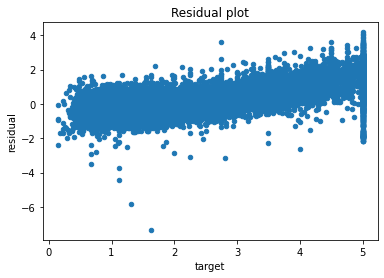

In [23]:
res = residual_df(y,yhat)

## Using normal equations to identify parameters

In [24]:
w_norm = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

In [25]:
yhat_norm = np.dot(X, w_norm)

In [26]:
mse(y, yhat_norm)

0.5243209861846072

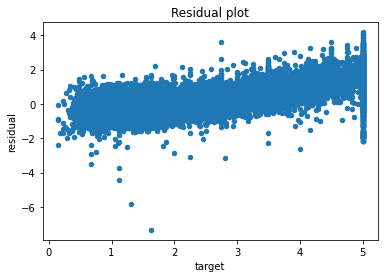

In [27]:
res_norm = residual_df(y,yhat_norm)

## Linear Regression class

In [159]:
class LinearRegression():
    def __init__(self, n_iter = 1000,learning_rate = 1e-5, tol = 1e-5, normalize = True, verbose = True):
        self.n_iter = n_iter
        self.tol = tol
        self.learning_rate = learning_rate
        self.verbose = verbose
        self.doNormalize = normalize
        
    def normalize(self, X):
        return ( X - X.mean(0))/X.std(0)
    
    def _preprocess(self, X):
        if self.doNormalize:
            X = self.normalize(X)
            
        return np.hstack([X, np.ones_like(X[:,[1]])])
    
    
    def fit(self, X, y, normal_eq = False):
        self.y = y.reshape(-1,1)
        self.yhat = None
        
        
        # Normalize and Adding bias
        self.X = self._preprocess(X)
        
        self.theta = self.init_theta =  np.random.randn(self.X.shape[1], 1)
        
        if normal_eq:
            self.normal_gradient()
        else:
            self.gradient_descent()
    
    def gradient_descent(self):
        w = self.init_theta
        X, y = self.X, self.y
        self.loss_res = []
        self.theta_res = [w]
        for _ in range(1, self.n_iter):
            yhat = np.dot(X,w)
            self.lastX = X
            self.loss_res.append(self.loss(y, yhat))
            if self.verbose:
                print(f"Loss at {_} :",self.loss_res[-1])
            
            grad  = np.dot(X.T, (y - yhat))/X.shape[0]

            nw = w + grad * self.learning_rate
            if np.allclose(grad, np.zeros_like(grad), atol=self.tol):
                print("Stopped due to no gradient change")
                break
            w = nw
            self.theta_res.append(nw)
            
        
        self.yhat = yhat
        self.theta = w
        
        
    def loss(self, y, yhat):
        if y.ndim==1:
            y = y.reshape(-1,1)
        if yhat.ndim== 1:
            yhat = yhat.reshape(-1,1)
        return np.mean((y-yhat)**2)
    
    def normal_gradient(self):
        self.theta = np.dot(np.linalg.inv(np.dot(self.X.T, self.X)), np.dot(self.X.T, self.y))
        
    def score(self, X, y):
        return self.loss(y,self.predict(X))
    
    def predict(self, X):
        X = self._preprocess(X)
        return np.dot(X, self.theta)
        
        

In [177]:
l = LinearRegression(verbose=False, learning_rate=0.05)

l.fit(raw_data_dict['data'], raw_data_dict['target'], normal_eq=False)

Text(0, 0.5, 'Cost')

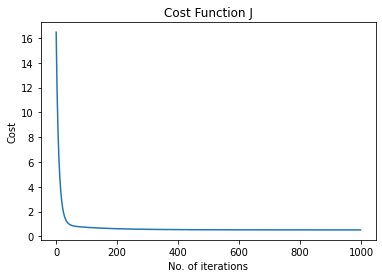

In [178]:
ax = pd.Series(l.loss_res).plot()

ax.set_title('Cost Function J')
ax.set_xlabel('No. of iterations')
ax.set_ylabel('Cost')

In [179]:
pd.concat([pd.Series(raw_data_dict['target'], name='target'),
           pd.Series(l.predict(raw_data_dict['data']).ravel(), name='predict')
           ], 1).head()

/Users/shravan.shetty/opt/anaconda3/envs/scpd/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,target,predict
0,4.526,4.142965
1,3.585,3.986269
2,3.521,3.669427
3,3.413,3.246808
4,3.422,2.395212


In [180]:
print("Training score: ", l.score( raw_data_dict['data'], raw_data_dict['target']))

Training score:  0.524953080166082


## Regularized Linear Regression

In [172]:
class RegularizedLR():
    def __init__(self, n_iter = 1000,reg_param = 0.1, learning_rate = 1e-5, tol = 1e-5, normalize = True, verbose = True):
        self.n_iter = n_iter
        self.tol = tol
        self.learning_rate = learning_rate
        self.verbose = print if verbose else lambda *X: None
        self.doNormalize = normalize
        self.reg_param = reg_param
        
        
    def normalize(self, X):
        return ( X - X.mean(0))/X.std(0)
    
    def _preprocess(self, X):
        if self.doNormalize:
            X = self.normalize(X)
            
        return np.hstack([X, np.ones_like(X[:,[1]])])
    
    
    def fit(self, X, y, normal_eq = False):
        self.y = y.reshape(-1,1)
        self.yhat = None
        
        
        # Normalize and Adding bias
        self.X = self._preprocess(X)
        
        self.theta = self.init_theta =  np.random.randn(self.X.shape[1], 1)
        
        if normal_eq:
            self.normal_gradient()
        else:
            self.gradient_descent()
    
    def gradient_descent(self):
        w = self.init_theta
        X, y = self.X, self.y
        
        for _ in range(1, self.n_iter):
            yhat = np.dot(X,w)
            self.verbose(f"Loss at {_} :",self.loss(y, yhat))
#                 self.verbose("Yhat shape, wshape: ", yhat.shape, w.shape)
            
            reg_w = w.copy()
            reg_w[-1] = [0]
            grad  =  (np.dot(X.T, (y - yhat))  + self.reg_param * reg_w)/X.shape[0]

            nw = w + grad * self.learning_rate 
            
            if np.allclose(grad, np.zeros_like(grad),rtol = self.tol , atol=self.tol):
                self.verbose("Stopped due to no gradient change")
                break
            w = nw
        
        self.yhat = yhat
        self.theta = w
        
        
    def loss(self, y, yhat):
        if y.ndim==1:
            y = y.reshape(-1,1)
        if yhat.ndim== 1:
            yhat = yhat.reshape(-1,1)
        return np.mean((y-yhat)**2)
    
    def normal_gradient(self):
        self.theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
        
    def score(self, X, y):
        return self.loss(y,self.predict(X))
    
    def predict(self, X):
        
        return np.dot(self._preprocess(X), self.theta)
        
        

In [173]:
r = RegularizedLR(reg_param = .1,learning_rate=0.1, verbose=False)

r.fit(raw_data_dict['data'], raw_data_dict['target'])

In [174]:
pd.concat([pd.Series(raw_data_dict['target'], name='target'),
           pd.Series(r.predict(raw_data_dict['data']).ravel(), name='predict')
           ], 1).head()

/Users/shravan.shetty/opt/anaconda3/envs/scpd/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,target,predict
0,4.526,4.132658
1,3.585,3.977893
2,3.521,3.675404
3,3.413,3.242177
4,3.422,2.411942


In [176]:
print("Training score: ", r.score( raw_data_dict['data'], raw_data_dict['target']))

Training score:  0.5243235136830284
